<a href="https://colab.research.google.com/github/mjavadpur/SVM/blob/main/Heart_Failure_PredictionSVM_S4_MJavadpurFunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-radius:10px;
            border : black solid;
            background-color: 	#FFFFF0;
            font-size:110%;
            text-align: left">

<h2 style='; border:0; border-radius: 10px; font-weight: bold; color:black'><center>About the data (Description of attributes)</center></h2>  
    
* **age:** Age of the patient 
* **anaemia:** Haemoglobin level of patient (Boolean) 
* **creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)
* **diabetes:** If the patient has diabetes (Boolean)
* **ejection_fraction:** Percentage of blood leaving the heart at each contraction
* **high_blood_pressure:** If the patient has hypertension (Boolean) 
* **platelets:** Platelet count of blood (kiloplatelets/mL)
* **serum_creatinine:** Level of serum creatinine in the blood (mg/dL)
* **serum_sodium:** Level of serum sodium in the blood (mEq/L)
* **sex:** Sex of the patient
* **smoking:** If the patient smokes or not (Boolean) 
* **time:** Follow-up period (days) 
* **DEATH_EVENT:** If the patient deceased during the follow-up period (Boolean)

**[Attributes having Boolean values:** 0 = Negative (No); 1 = Positive (Yes)]

# Step 1: Import Libararies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2:  Import Dataset

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Workshop/SVM/heart_failure_clinical_records_dataset.csv')

# Step 3: Dataset overview

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [62]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [63]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [64]:
corr = df.corr()
corr['DEATH_EVENT'].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

# Step 4: EDA

In [65]:
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']



print('Categorical Features are : ', categorical_features)

print('Continuous Features are : ', numerical_features)




Categorical Features are :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
Continuous Features are :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


# Step 5: Data prepration (pre_processing)

In [66]:
from sklearn.neighbors import LocalOutlierFactor

In [67]:
lof_outliers = df.copy()
lof_outliers = lof_outliers.drop(lof_outliers.index,axis = 0)
lof_outliers

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [68]:

lof = LocalOutlierFactor(n_neighbors=50)
df['lof'] = lof.fit_predict(df)
lof_outliers = lof_outliers.append(df[df['lof'] == -1])
df.drop('lof',axis = 1, inplace = True)

<ipython-input-68-37b0c428f20c>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lof_outliers = lof_outliers.append(df[df['lof'] == -1])


### Removing outlier data for age

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

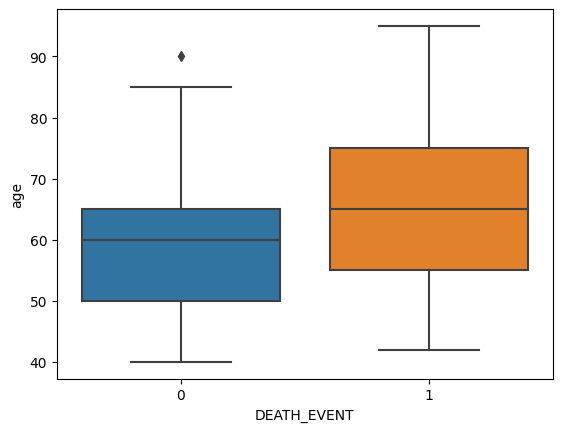

In [69]:
sns.boxplot(df, x='DEATH_EVENT', y='age')

In [70]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [71]:
boxplot_outliers = df[(df['age'] > 85)  & (df['DEATH_EVENT'] == 0)]
boxplot_outliers

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0


In [72]:
index_drop_age_0 = df[(df['age'] > 85)  & (df['DEATH_EVENT'] == 0)].index
# df = df.drop(index_drop_age_0, axis = 0)

### Removing outlier data for resting_blood_pressure

<Axes: xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

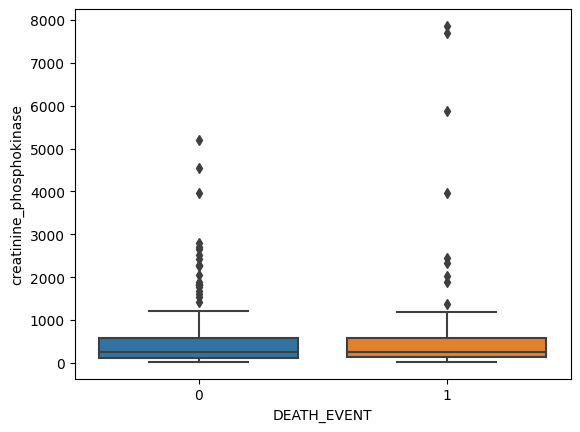

In [73]:
sns.boxplot(df, x='DEATH_EVENT', y='creatinine_phosphokinase')

In [74]:
boxplot_outliers = boxplot_outliers.append(df[(df['creatinine_phosphokinase'] >= 1500) & (df['DEATH_EVENT'] == 0)])

<ipython-input-74-e1d74491fa68>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['creatinine_phosphokinase'] >= 1500) & (df['DEATH_EVENT'] == 0)])


In [75]:
index_drop_resting_blood_pressure_0 = df[(df['creatinine_phosphokinase'] >= 1500) & (df['DEATH_EVENT'] == 0)].index
# df = df.drop(index_drop_resting_blood_pressure_0, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

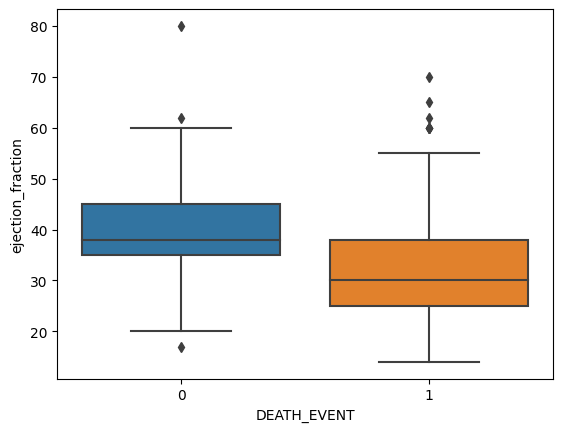

In [76]:
sns.boxplot(df, x='DEATH_EVENT', y='ejection_fraction')

In [77]:
boxplot_outliers = boxplot_outliers.append(df[((df['ejection_fraction'] > 60) | (df['ejection_fraction'] < 20)) & (df['DEATH_EVENT'] == 0)])

<ipython-input-77-c9c500388358>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[((df['ejection_fraction'] > 60) | (df['ejection_fraction'] < 20)) & (df['DEATH_EVENT'] == 0)])


In [78]:
index_drop_resting_blood_pressure_0 = df[((df['ejection_fraction'] > 60) | (df['ejection_fraction'] < 20)) & (df['DEATH_EVENT'] == 0)].index
# df = df.drop(index_drop_resting_blood_pressure_0, axis = 0)

In [79]:
boxplot_outliers = boxplot_outliers.append(df[(df['ejection_fraction'] > 55) & (df['DEATH_EVENT'] == 1)])

<ipython-input-79-6cbcb127c174>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['ejection_fraction'] > 55) & (df['DEATH_EVENT'] == 1)])


In [80]:
index_drop_resting_blood_pressure_1 = df[(df['ejection_fraction'] > 55) & (df['DEATH_EVENT'] == 1)].index
# df = df.drop(index_drop_resting_blood_pressure_1, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

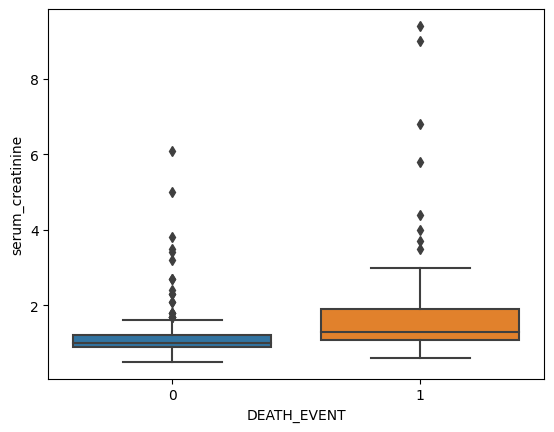

In [81]:
sns.boxplot(df, x='DEATH_EVENT', y='serum_creatinine')

## Removing outlier data for serum_sodium

In [82]:
df.shape

(299, 13)

<Axes: xlabel='DEATH_EVENT', ylabel='serum_sodium'>

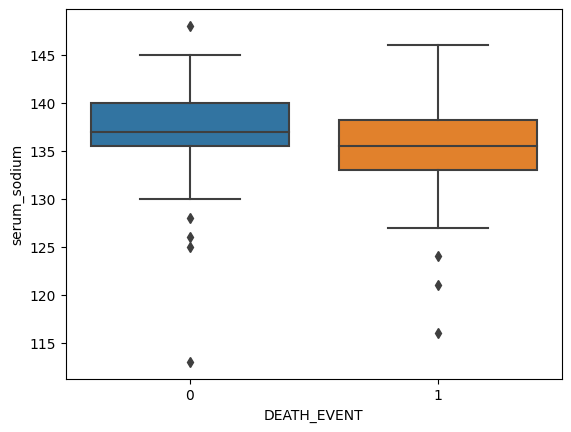

In [83]:
sns.boxplot(df, x='DEATH_EVENT', y='serum_sodium')

In [84]:
boxplot_outliers = boxplot_outliers.append(df[((df['serum_sodium'] > 145) | (df['serum_sodium'] < 128)) & (df['DEATH_EVENT'] == 0)])

<ipython-input-84-b7ad1a58555e>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[((df['serum_sodium'] > 145) | (df['serum_sodium'] < 128)) & (df['DEATH_EVENT'] == 0)])


In [85]:
index_drop_cholesterol_0 = df[((df['serum_sodium'] > 145) | (df['serum_sodium'] < 128)) & (df['DEATH_EVENT'] == 0)].index
# df = df.drop(index_drop_cholesterol_0, axis = 0)

In [86]:
boxplot_outliers = boxplot_outliers.append(df[(df['serum_sodium'] < 126) & (df['DEATH_EVENT'] == 1)])

<ipython-input-86-c8b816259c98>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['serum_sodium'] < 126) & (df['DEATH_EVENT'] == 1)])


In [87]:
index_drop_cholesterol_1 = df[(df['serum_sodium'] < 126) & (df['DEATH_EVENT'] == 1)].index
# df = df.drop(index_drop_cholesterol_1, axis = 0)

### Removing outlier data for time

<Axes: xlabel='DEATH_EVENT', ylabel='time'>

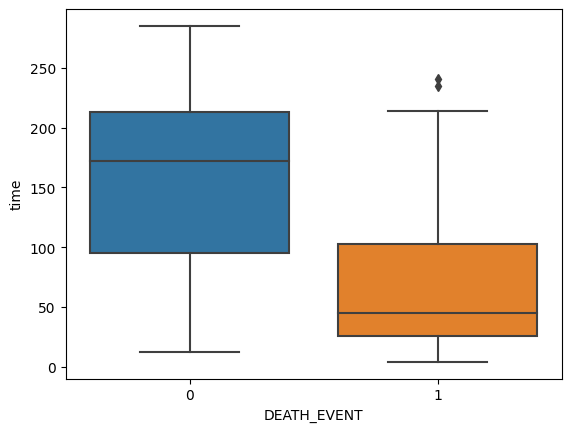

In [88]:
sns.boxplot(df, x='DEATH_EVENT', y='time')

In [89]:
boxplot_outliers = boxplot_outliers.append(df[(df['time'] >240 ) & (df['DEATH_EVENT'] == 1)])

<ipython-input-89-9d77971eaeb9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['time'] >240 ) & (df['DEATH_EVENT'] == 1)])


In [90]:
index_drop_time_0 = df[(df['time'] >240 ) & (df['DEATH_EVENT'] == 1)].index
# df = df.drop(index_drop_time_0, axis = 0)

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

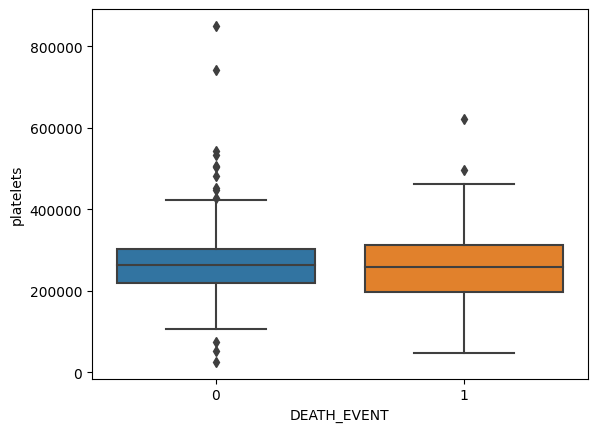

In [91]:
sns.boxplot(df, x='DEATH_EVENT', y='platelets')         

In [92]:
boxplot_outliers = boxplot_outliers.append(df[(df['platelets'] > 470000) & (df['DEATH_EVENT'] == 1)])

<ipython-input-92-c2a7041bb649>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['platelets'] > 470000) & (df['DEATH_EVENT'] == 1)])


In [93]:
index_drop_platelets_1 = df[(df['platelets'] > 470000) & (df['DEATH_EVENT'] == 1)].index
# df = df.drop(index_drop_platelets_1, axis = 0)

In [94]:
boxplot_outliers = boxplot_outliers.append(df[(df['platelets'] > 452000) & (df['DEATH_EVENT'] == 0)])

<ipython-input-94-4fa09a473f18>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  boxplot_outliers = boxplot_outliers.append(df[(df['platelets'] > 452000) & (df['DEATH_EVENT'] == 0)])


In [95]:
index_drop_platelets_achieved_0 =df[(df['platelets'] > 452000) & (df['DEATH_EVENT'] == 0)].index
# df = df.drop(index_drop_platelets_achieved_0, axis = 0)

In [96]:
df.shape

(299, 13)

# Step 6: Scaling the Features

In [97]:
def my_model(df):
    from sklearn.preprocessing import StandardScaler
    scaler= StandardScaler()

    #scale selected data
    df_scaled = df.copy()
    df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

    X=df_scaled.drop('DEATH_EVENT',axis=1)
    y=df_scaled['DEATH_EVENT']

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

    from sklearn.svm import SVC
    svm_model= SVC()
    svm_model.fit(X_train, y_train)

    y_pred= svm_model.predict(X_test)



    from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
    from sklearn import metrics

    acc_score = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    from sklearn.model_selection import GridSearchCV
    svm = SVC()
    param_grid = {'C':[0.01,0.1,1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
    grid = GridSearchCV(svm,param_grid, cv=5)


    grid.fit(X_train, y_train)
    best_estimator_ = grid.best_estimator_
    best_params_ = grid.best_params_
    y_pred_grid= grid.predict(X_test)

    best_model_acc_score = accuracy_score(y_test, y_pred_grid)
    best_model_conf_matrix = confusion_matrix(y_test, y_pred_grid)
    best_model_class_report = classification_report(y_test, y_pred_grid)

    return acc_score, conf_matrix, class_report, best_model_acc_score, best_model_conf_matrix, best_model_class_report,best_estimator_ ,best_params_


In [98]:
acc_score, conf_matrix, class_report, best_model_acc_score, best_model_conf_matrix, best_model_class_report, best_estimator_, best_params_ = my_model(df)


In [99]:
print('----------------- Default MODEL ----------------')
print('\n')
print('accuracy_score: \n', acc_score)
print('\n')
print('confusion_matrix: \n', conf_matrix)
print('\n')
print('classification_report: \n', class_report)
print('\n')
print('----------------- BEST MODEL ----------------')
print('\n')
print('best_estimator_: \n', best_estimator_)
print('\n')
print('best_params_: \n', best_params_)
print('\n')
print('best_model_accuracy_score: \n', best_model_acc_score)
print('\n')
print('best_model_confusion_matrix: \n', best_model_conf_matrix)
print('\n')
print('best_model_classification_report: \n', best_model_class_report)

----------------- Default MODEL ----------------


accuracy_score: 
 0.7166666666666667


confusion_matrix: 
 [[32 11]
 [ 6 11]]


classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.50      0.65      0.56        17

    accuracy                           0.72        60
   macro avg       0.67      0.70      0.68        60
weighted avg       0.75      0.72      0.73        60



----------------- BEST MODEL ----------------


best_estimator_: 
 SVC(C=100, gamma=0.001)


best_params_: 
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


best_model_accuracy_score: 
 0.7166666666666667


best_model_confusion_matrix: 
 [[32 11]
 [ 6 11]]


best_model_classification_report: 
               precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.50      0.65      0.56        17

    accuracy                           0.72        60
   m

In [100]:
index_diff = lof_outliers.index.difference(boxplot_outliers.index)
print(len(index_diff))
index_diff

13


Int64Index([14, 15, 47, 55, 162, 163, 167, 176, 230, 275, 277, 279, 281], dtype='int64')

In [101]:
index_diff = boxplot_outliers.index.difference(lof_outliers.index)
print(len(index_diff))
index_diff

34


Int64Index([  4,   8,  38,  44,  52,  64, 103, 107, 110, 113, 114, 126, 130,
            134, 139, 147, 149, 153, 171, 199, 208, 210, 211, 217, 225, 227,
            236, 250, 266, 280, 283, 289, 295, 297],
           dtype='int64')

In [102]:
print(lof_outliers.index)
print(len(lof_outliers))

Int64Index([  7,  14,  15,  19,  47,  55,  69, 105, 109, 117, 162, 163, 167,
            176, 200, 212, 224, 230, 240, 275, 277, 279, 281, 287, 296],
           dtype='int64')
25


In [103]:
print(boxplot_outliers.index.sort_values())
print(len(boxplot_outliers))

Int64Index([  4,   7,   8,  19,  38,  44,  52,  64,  69, 103, 105, 107, 109,
            110, 113, 114, 117, 126, 130, 134, 139, 147, 149, 153, 171, 199,
            200, 208, 210, 211, 212, 217, 224, 225, 227, 236, 240, 250, 266,
            280, 283, 287, 289, 295, 296, 296, 297],
           dtype='int64')
47


# **Drop LOF Outliers and Run Model**

In [104]:
LOF_dropped_Outliers_df = df.drop(lof_outliers.index, axis = 0)
print(LOF_dropped_Outliers_df.shape , '\n')
acc_score, conf_matrix, class_report, best_model_acc_score, best_model_conf_matrix, best_model_class_report, best_estimator_, best_params_ = my_model(LOF_dropped_Outliers_df)
print('----------------- Default MODEL ----------------')
print('\n')
print('accuracy_score: \n', acc_score)
print('\n')
print('confusion_matrix: \n', conf_matrix)
print('\n')
print('classification_report: \n', class_report)
print('\n')
print('----------------- BEST MODEL ----------------')
print('\n')
print('best_estimator_: \n', best_estimator_)
print('\n')
print('best_params_: \n', best_params_)
print('\n')
print('best_model_accuracy_score: \n', best_model_acc_score)
print('\n')
print('best_model_confusion_matrix: \n', best_model_conf_matrix)
print('\n')
print('best_model_classification_report: \n', best_model_class_report)

(274, 13) 

----------------- Default MODEL ----------------


accuracy_score: 
 0.8727272727272727


confusion_matrix: 
 [[36  3]
 [ 4 12]]


classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91        39
           1       0.80      0.75      0.77        16

    accuracy                           0.87        55
   macro avg       0.85      0.84      0.84        55
weighted avg       0.87      0.87      0.87        55



----------------- BEST MODEL ----------------


best_estimator_: 
 SVC(C=100, gamma=0.001)


best_params_: 
 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


best_model_accuracy_score: 
 0.9090909090909091


best_model_confusion_matrix: 
 [[37  2]
 [ 3 13]]


best_model_classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        39
           1       0.87      0.81      0.84        16

    accuracy                           0.91   

# **Drop with BOX_PLOT detected Outliers and Run Model**

In [105]:
boxplot_dropped_outliers_df = df.drop(boxplot_outliers.index, axis = 0)
print(boxplot_dropped_outliers_df.shape , '\n')
acc_score, conf_matrix, class_report, best_model_acc_score, best_model_conf_matrix, best_model_class_report, best_estimator_, best_params_ = my_model(boxplot_dropped_outliers_df)
print('----------------- Default MODEL ----------------')
print('\n')
print('accuracy_score: \n', acc_score)
print('\n')
print('confusion_matrix: \n', conf_matrix)
print('\n')
print('classification_report: \n', class_report)
print('\n')
print('----------------- BEST MODEL ----------------')
print('\n')
print('best_estimator_: \n', best_estimator_)
print('\n')
print('best_params_: \n', best_params_)
print('\n')
print('best_model_accuracy_score: \n', best_model_acc_score)
print('\n')
print('best_model_confusion_matrix: \n', best_model_conf_matrix)
print('\n')
print('best_model_classification_report: \n', best_model_class_report)

(253, 13) 

----------------- Default MODEL ----------------


accuracy_score: 
 0.8431372549019608


confusion_matrix: 
 [[34  4]
 [ 4  9]]


classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.69      0.69      0.69        13

    accuracy                           0.84        51
   macro avg       0.79      0.79      0.79        51
weighted avg       0.84      0.84      0.84        51



----------------- BEST MODEL ----------------


best_estimator_: 
 SVC(C=10, gamma=0.01)


best_params_: 
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


best_model_accuracy_score: 
 0.7843137254901961


best_model_confusion_matrix: 
 [[32  6]
 [ 5  8]]


best_model_classification_report: 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        38
           1       0.57      0.62      0.59        13

    accuracy                           0.78       